# Machine Learning: Session 2

## Regression, regularization and cross-validation

In this task you will experiment with linear regression and see what happens when we use regularized versions of it. More precisely, you will try out Ridge and Lasso regularization. In addition, we will see how using cross-validation helps us to get more stable estimates for our performance.

Read in the data in **data.csv** and split it into training (50%) and testing (50%) set. Use random seed 0 (train_test_split method).

In [1]:
import pandas as pd
import sklearn
import numpy as np

CRED = '\033[91m'
CEND = '\033[0m'

data = pd.read_csv("data.csv", index_col = 0)

In [2]:
data.head()

x0        x1        x2        x3        x4        x5        x6  \
0  0.080349  0.639349  0.390906 -0.580971 -0.620030 -0.236409 -0.763078   
1 -0.116856 -0.498531 -0.684169  0.077253  0.098062  0.386376  0.291100   
2  0.039961 -0.272807  0.012267  0.480218 -0.940289 -0.401513  0.009838   
3  0.771496 -0.796448  0.984355  0.610398 -0.990062 -0.753239 -0.220492   
4  0.361182  0.683095  0.144422 -0.212102  0.809841 -0.385002  0.814130   

         x7        x8        x9  ...       x90       x91       x92       x93  \
0  0.427492  0.967570  0.015933  ... -0.139344 -0.291604  0.266342 -0.049433   
1 -0.567685 -0.989671 -0.335158  ...  0.059927 -0.436386 -0.184519  0.532634   
2  0.377938 -0.590478  0.873809  ... -0.464189 -0.308448 -0.838500  0.063881   
3 -0.617558 -0.061858  0.175305  ...  0.798310 -0.270656  0.335484  0.542347   
4 -0.092675  0.254998 -0.642654  ... -0.951702  0.847505 -0.257791 -0.096182   

        x94       x95       x96       x97       x98          y  
0 -0.160509 -0.424423 -0.265763 -0.087113  0.239603   0.015612  
1 -0.351102  0.586002 -0.418230 -0.949063 -0.905788 -10.986965  
2 -0.466918  0.103312 -0.889489  0.248117  0.403139  -6.040779  
3 -0.609419  0.008610 -0.822110  0.347330  0.859579  -0.118373  
4  0.842007 -0.563902 -0.177977  0.776424  0.177626  15.604059  

[5 rows x 100 columns]

In [3]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data.y, test_size=0.5, random_state=0)

In [5]:
##### YOUR CODE ENDS ##### (please do not delete this line)

## Task 1. Multivariate linear regression (1 point)

#### <font color='purple'>(a) Implement the fitting procedure of non-regularized multivariate ordinary least squares linear regression, as presented in the lecture slides (matrix operations). Fit on the training data and save the coefficients and the intercept for use in subtask (1c). Print out the coefficients corresponding to the five first features.

In [6]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [7]:
from sklearn.preprocessing import add_dummy_feature 
X_train_with_dummy = add_dummy_feature(X_train) # Add the Ones for the intercept coefficient


In [8]:
my_ols_coefficients = np.linalg.inv(X_train_with_dummy.T @ X_train_with_dummy) @ (X_train_with_dummy.T @ y_train)
first_five_my_ols_coefficients = my_ols_coefficients[0:5]
first_five_my_ols_coefficients

array([ 1.53145961, 11.85875833,  7.7562925 ,  9.63087962,  6.99932448])

In [9]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [10]:
print('Coefficients of five first features according to my OLS implementation:', first_five_my_ols_coefficients)

Coefficients of five first features according to my OLS implementation: [ 1.53145961 11.85875833  7.7562925   9.63087962  6.99932448]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.LinearRegression` learning algorithm from the sklearn package. Fit the model on the training data and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.

In [11]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
first_five_sklearn_ols_coefficients = np.hstack((lr.intercept_, lr.coef_ ))[0:5]

In [13]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [14]:
print('Coefficients of five first features according to sklearn OLS implementation:', first_five_sklearn_ols_coefficients)

Coefficients of five first features according to sklearn OLS implementation: [ 1.53145961 11.85875833  7.7562925   9.63087962  6.99932448]


#### <font color='purple'>(c) Demonstrate that the methods of subtasks (1a) and (1b) give the same results by showing that they find the same coefficients and intercept. </font>

You maybe won't get exactly the same results because of precision problems of floats so the idea is to compare if the values are equal up to some precision (e.g. check if the difference is less than 0.000001). If for some reason you are not able to get the assertions to pass with the given precision then please change the precision such that the assertions would pass.

In [15]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Please assign intercepts and coefficients to the given variables.")
    my_intercept = my_ols_coefficients[0]
    my_coefficients = my_ols_coefficients[1:]
    sklearn_intercept = lr.intercept_
    sklearn_coefficients = lr.coef_
    precision = 0.000001
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    assert abs(my_intercept - sklearn_intercept) < precision
    for i in range(99):
        assert abs(my_coefficients[i] - sklearn_coefficients[i]) < precision
    print("The assertions have passed with precision:", precision)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

The assertions have passed with precision: 1e-06


#### <font color='purple'>(d) Using the sklearn model from subtask (1b) predict the results on the training and testing set and calculate and show the root mean square errors (RMSE). Since you need to do the same evaluation in future tasks also, please implement a function 'evaluate' for this.

In [16]:
from sklearn.metrics import mean_squared_error

def evaluate(regression_model_class_instance, trainX, trainY, testX, testY):
    print("\n#################\n")
    print(regression_model_class_instance, '\n')
    
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Implement RMSE for train and test sets.")
    rmse_tr = np.sqrt(mean_squared_error(trainY, regression_model_class_instance.predict(trainX)))
    rmse_te = np.sqrt(mean_squared_error(testY, regression_model_class_instance.predict(testX)))
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    print("RMSE train:", rmse_tr)
    print("RMSE test:", rmse_te)
    
    return rmse_tr, rmse_te

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(lr , X_train, y_train, X_test, y_test)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)


#################

LinearRegression() 

RMSE train: 2.0525446936460357e-14
RMSE test: 7.715131133028424


## Task 2. Ridge & Lambda regularized regression  (1 point)

This blogpost might clarify regularization a bit: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

Intuition behind the regularization: https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

#### <font color='purple'>(a) Implement the fitting procedure of ridge regression, as presented in the lecture slides (matrix operations). Fit on the training data with regularization parameter equal to 1 and save the coefficients and the intercept for use in subtask (2c). Print out the coefficients corresponding to the five first features.

In [17]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [18]:
my_ridge_coefficients = np.linalg.inv(X_train_with_dummy.T @ X_train_with_dummy + 1 * np.identity(X_train_with_dummy.shape[1])) @ (X_train_with_dummy.T @ y_train)
first_five_my_ridge_coefficients = my_ridge_coefficients[0:5]

In [19]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [20]:
print('Coefficients of five first features according to my ridge implementation:', first_five_my_ridge_coefficients)

Coefficients of five first features according to my ridge implementation: [-0.31588906  7.91026896  7.37023604  6.97156822  6.03240044]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.Ridge` learning algorithm from the sklearn package. Fit the model on the training data with regularization parameter equal to 1 and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.</font>

Use parameters `solver = "cholesky", tol = 0.000000000001` in order to get more similar results to your own implementation. The default parameter for the regularization is already 1 so no need to specify that. The parameters `solver` and `tol` are necessary to force sklearn to use closed-form solution. Otherwise it would use numerical optimization which would give more different results from yours. **In the future tasks, please use the default option and don't force it to use the closed-form solution (numerical will be faster!).**

In [21]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, solver="cholesky", tol=0.000000000001)
ridge.fit(X_train, y_train)
first_five_sklearn_ridge_coefficients = np.hstack((ridge.intercept_, ridge.coef_[0:4]))

In [23]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [24]:
print('Coefficients of five first features according to my ridge implementation:', first_five_sklearn_ridge_coefficients)

Coefficients of five first features according to my ridge implementation: [-0.33402533  7.9028966   7.36974365  6.97110025  6.02447226]


#### <font color='purple'>(c) Demonstrate the correctess of your implementation the same way as in the previous exercise. For this compare your coefficients and intercept as obtained in subtask (2a) with the coeffiecients and intercept from sklearn, as obtained in subtask (2b). The results can actually vary quite a bit due to implementation differences in matrix operations. Compare that the differences in results (coefficients and intercept) are less than 0.02. If for some reason you are not able to get the assertions to pass with the given precision then please change the precision such that the assertions would pass.

In [25]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Please assign intercepts and coefficients to the given variables.")
    my_ridge_intercept = my_ridge_coefficients[0]
    my_ridge_coefficients = my_ridge_coefficients[1:]
    sklearn_ridge_intercept = ridge.intercept_
    sklearn_ridge_coefficients = ridge.coef_
    precision = 0.02
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    assert(abs(my_ridge_intercept - sklearn_ridge_intercept) < precision)
    for i in range(99):
        assert(abs(my_ridge_coefficients[i] - sklearn_ridge_coefficients[i]) < precision)
    print('The assertions have passed with precision:',precision)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

The assertions have passed with precision: 0.02


#### <font color='purple'>(d) Train a Lasso model using the sklearn package (use the default regularization parameter) and save it for future use. Print out the coefficients corresponding to the five first features.</font>

In [26]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
first_five_sklearn_lasso_coefficients = np.hstack((lasso.intercept_, lasso.coef_[0:4]))

In [28]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [29]:
print('Coefficients of five first features according to sklearn lasso implementation:', first_five_sklearn_lasso_coefficients)

Coefficients of five first features according to sklearn lasso implementation: [-0.11788209  6.94577472  5.59046803  5.11228019  3.00075122]


#### <font color='purple'>(e) Evaluate the sklearn Ridge and Lasso models on the training and testing set and calculate and show the RMSE, using the function 'evaluate' from subtask (1d).

In [30]:
try:
    print('Evaluation of sklearn ridge regression model:')
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(ridge, X_train, y_train, X_test, y_test)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    
    print('Evaluation of sklearn lasso regression model:')
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(lasso, X_train, y_train, X_test, y_test)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

Evaluation of sklearn ridge regression model:

#################

Ridge(alpha=1, solver='cholesky', tol=1e-12) 

RMSE train: 0.5159376269540161
RMSE test: 4.44622036475553
Evaluation of sklearn lasso regression model:

#################

Lasso(alpha=1) 

RMSE train: 4.984130516628729
RMSE test: 5.400343154987264


## Task 3. Choosing a suitable regularization parameter  (1 point)

Since different parameters can lead to very different results we need to do some parameter tuning and find a suitable regularization parameter for both Ridge and Lasso. We could try out different values and see which ones lead to the best results on the test set. However, then we would overfit to our test data and we would not have an adequate estimate of how good the model is in the end. That is why we need to do parameter tuning only using the training set.

Use **alphas = np.linspace(0.01, 10, 100)** for Ridge and **alphas = np.linspace(0.01, 5, 100)** for Lasso. The method generates 100 values with equal steps between the first and second parameter.

#### <font color='purple'>(a) **Method 1:** Divide the training set into training and validation set using 90%/10% split and a random seed 0 (train_test_split method). Train Ridge and Lasso models with different alpha values on the training set and calculate the RMSE values on the validation set. Choose and report the alpha that has the best RMSE for Ridge and another alpha that has the best RMSE for Lasso (save both alpha and RMSE values).

In [31]:
method_logs_df = pd.DataFrame(
    columns=["model", "method", "rmse_tr", "rmse_val", "alpha"]
    + ["coef_" + str(i) for i in range(99)]
)

In [32]:
def method_1(Model, alphas, random_seed):
    """Split the train set into train and validation sets"""
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Calculate RMSE for Ridge and Lasso models.")
    global X_train, y_train, X_test, y_test, method_logs_df
    best_alpha, best_rmse = np.inf, np.inf

    for alpha in alphas:
        # Splitting the train set into train and validation sets
        X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
            X_train, y_train, test_size=0.1, random_state=random_seed
        )

        # Creating, Fitting and Evaluating the model
        model = Model(alpha=alpha, random_state=random_seed)
        model.fit(X_train_val, y_train_val)
        rmse_tr, rmse_val = evaluate(
            model, X_train_val, y_train_val, X_test_val, y_test_val
        )

        # Update the best alpha and best rmse if the current rmse is better
        if rmse_val < best_rmse:
            best_rmse = rmse_val
            best_alpha = alpha

        # Append the results to the dataframe
        method_logs_df = pd.concat(
            [
                method_logs_df,
                pd.DataFrame(
                    {
                        "model": [Model.__name__],
                        "method": [1],
                        "rmse_tr": [rmse_tr],
                        "rmse_val": [rmse_val],
                        "alpha": [alpha],
                        **{"coef_" + str(i): [model.coef_[i]] for i in range(99)},
                    }
                ),
            ],
        )

    ##### YOUR CODE ENDS ##### (please do not delete this line)
    return best_alpha, best_rmse


try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    method_1(Lasso, np.linspace(0.01, 10, 100), 0)  ## ridge
    method_1(Ridge, np.linspace(0.01, 5, 100), 0)  ## lasso
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)


#################

Lasso(alpha=0.01, random_state=0) 

RMSE train: 0.25494959429169006
RMSE test: 0.8469599072580011

#################

Lasso(alpha=0.1109090909090909, random_state=0) 

RMSE train: 0.8456272453410706
RMSE test: 0.7781550651905318

#################

Lasso(alpha=0.21181818181818182, random_state=0) 

RMSE train: 1.3787306427635735
RMSE test: 1.13196669907568

#################

Lasso(alpha=0.31272727272727274, random_state=0) 

RMSE train: 1.8976137180811452
RMSE test: 1.4727145086786255

#################

Lasso(alpha=0.41363636363636364, random_state=0) 

RMSE train: 2.427964328040399
RMSE test: 1.8130901136502466

#################

Lasso(alpha=0.5145454545454545, random_state=0) 

RMSE train: 2.947657769711174
RMSE test: 2.1695533142259236

#################

Lasso(alpha=0.6154545454545455, random_state=0) 

RMSE train: 3.386062217769577
RMSE test: 2.49188915919778

#################

Lasso(alpha=0.7163636363636363, random_state=0) 

RMSE train: 3.771911979305135


#### <font color='purple'>(b) **Method 2:** Instead of doing only one training/validation split, use 10-fold cross validation. For each alpha value calculate the validation errors for each of the folds and average the results. Then choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values). For doing the 10-fold split use the sklearn method KFold (kf = KFold(n_splits=10, random_state = 0, shuffle = True)). To see more about how to iterate through the folds see the documentation for the method.

In [33]:
from sklearn.model_selection import KFold


def method_2(Model, alphas, random_seed):
    """10-fold cross-validation"""
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Implement 10-fold cross-validation.")
    global X_train, y_train, X_test, y_test, method_logs_df

    best_alpha, best_rmse, best_rmse_tr = np.inf, np.inf, np.inf

    for alpha in alphas:
        kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

        for train_i, test_i in kfold.split(X_train):
            X_train_val, X_test_val = X_train.iloc[train_i], X_train.iloc[test_i]
            y_train_val, y_test_val = y_train.iloc[train_i], y_train.iloc[test_i]

            # Creating, Fitting and Evaluating the model
            model = Model(alpha=alpha, random_state=random_seed)
            model.fit(X_train_val, y_train_val)
            rmse_tr, rmse_val = evaluate(
                model, X_train_val, y_train_val, X_test_val, y_test_val
            )

            # Update the best alpha and best rmse if the current rmse is better
            if rmse_val < best_rmse:
                best_rmse = rmse_val
                best_alpha = alpha
                best_rmse_tr = rmse_tr

        # Append the results to the dataframe
        method_logs_df = pd.concat(
            [
                method_logs_df,
                pd.DataFrame(
                    {
                        "model": [Model.__name__],
                        "method": [2],
                        "rmse_tr": [best_rmse_tr],
                        "rmse_val": [best_rmse],
                        "alpha": [best_alpha],
                        **{"coef_" + str(i): [model.coef_[i]] for i in range(99)},
                    }
                ),
            ],
        )

    ##### YOUR CODE ENDS ##### (please do not delete this line)
    return best_alpha, best_rmse


try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    method_2(Lasso, np.linspace(0.01, 10, 100), 0)  ## ridge
    method_2(Ridge, np.linspace(0.01, 5, 100), 0)  ## lasso
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)


#################

Lasso(alpha=0.01, random_state=0) 

RMSE train: 0.2549495942916895
RMSE test: 0.8469599072580136

#################

Lasso(alpha=0.01, random_state=0) 

RMSE train: 0.25138756418518554
RMSE test: 0.9166435784690615

#################

Lasso(alpha=0.01, random_state=0) 

RMSE train: 0.2725087823742494
RMSE test: 0.637067373219264

#################

Lasso(alpha=0.01, random_state=0) 

RMSE train: 0.2540854317765689
RMSE test: 0.7595696743184971

#################

Lasso(alpha=0.01, random_state=0) 

RMSE train: 0.25636897439233447
RMSE test: 0.8005048168386348

#################

Lasso(alpha=0.01, random_state=0) 

RMSE train: 0.2616695095536817
RMSE test: 0.7460651850164672

#################

Lasso(alpha=0.01, random_state=0) 

RMSE train: 0.2716636324162817
RMSE test: 0.8990233534530274

#################

Lasso(alpha=0.01, random_state=0) 

RMSE train: 0.2393705589719955
RMSE test: 1.1427630848636303

#################

Lasso(alpha=0.01, random_state=0) 

RMSE tr


#################

Lasso(alpha=1.7254545454545454, random_state=0) 

RMSE train: 7.970891796824546
RMSE test: 7.197556421715576

#################

Lasso(alpha=1.7254545454545454, random_state=0) 

RMSE train: 7.730670146861962
RMSE test: 5.590103449327676

#################

Lasso(alpha=1.7254545454545454, random_state=0) 

RMSE train: 7.8311343355148635
RMSE test: 12.183760120752462

#################

Lasso(alpha=1.7254545454545454, random_state=0) 

RMSE train: 7.794894671530443
RMSE test: 7.014448348991261

#################

Lasso(alpha=1.7254545454545454, random_state=0) 

RMSE train: 7.798386786283471
RMSE test: 7.9047972640915

#################

Lasso(alpha=1.7254545454545454, random_state=0) 

RMSE train: 7.707186309979995
RMSE test: 8.130783439350573

#################

Lasso(alpha=1.7254545454545454, random_state=0) 

RMSE train: 7.872304564021557
RMSE test: 8.080854237047397

#################

Lasso(alpha=1.8263636363636364, random_state=0) 

RMSE train: 8.2878027791632

## Task 4. Comparing the stability of Method 1 and Method 2  (1 point)

#### <font color='purple'>(a) Run Method 1 and Method 2 both 10 times, every time using a different value 0,1,2,...,9 as the random_state. Report the best alpha and RMSE for both parameter tuning methods and for both regularization methods for each of the 10 trials.

In [34]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [35]:
def random_state_tuning(method, Model, alphas):
    best_method_rmse, best_method_alpha = np.inf, np.inf
    for random_state in range(10):
        alpha, rmse =  method(Model, alphas, random_state)
        
        if rmse < best_method_rmse:
            best_method_rmse = rmse
            best_method_alpha = alpha
            
    return best_method_alpha, best_method_rmse

# Clear the dataframe
method_logs_df.drop(method_logs_df.index, inplace=True)

best_lasso_method_1_alpha, best_lasso_method_1_rmse = random_state_tuning(method_1, Lasso, np.linspace(0.01, 10, 100))
best_lasso_method_2_alpha, best_lasso_method_2_rmse = random_state_tuning(method_2, Lasso, np.linspace(0.01, 10, 100))
best_ridge_method_1_alpha, best_ridge_method_1_rmse = random_state_tuning(method_1, Ridge, np.linspace(0.01, 10, 100))
best_ridge_method_2_alpha, best_ridge_method_2_rmse = random_state_tuning(method_2, Ridge, np.linspace(0.01, 10, 100))

print(f"Best Lasso alpha for method 1: {best_lasso_method_1_alpha}, Best Lasso RMSE for method 1: {best_lasso_method_1_rmse}")
print(f"Best Lasso alpha for method 2: {best_lasso_method_2_alpha}, Best Lasso RMSE for method 2: {best_lasso_method_2_rmse}")
print(f"Best Ridge alpha for method 1: {best_ridge_method_1_alpha}, Best Ridge RMSE for method 1: {best_ridge_method_1_rmse}")
print(f"Best Ridge alpha for method 2: {best_ridge_method_2_alpha}, Best Ridge RMSE for method 2: {best_ridge_method_2_rmse}")



#################

Lasso(alpha=0.01, random_state=0) 

RMSE train: 0.25494959429169006
RMSE test: 0.8469599072580011

#################

Lasso(alpha=0.1109090909090909, random_state=0) 

RMSE train: 0.8456272453410706
RMSE test: 0.7781550651905318

#################

Lasso(alpha=0.21181818181818182, random_state=0) 

RMSE train: 1.3787306427635735
RMSE test: 1.13196669907568

#################

Lasso(alpha=0.31272727272727274, random_state=0) 

RMSE train: 1.8976137180811452
RMSE test: 1.4727145086786255

#################

Lasso(alpha=0.41363636363636364, random_state=0) 

RMSE train: 2.427964328040399
RMSE test: 1.8130901136502466

#################

Lasso(alpha=0.5145454545454545, random_state=0) 

RMSE train: 2.947657769711174
RMSE test: 2.1695533142259236

#################

Lasso(alpha=0.6154545454545455, random_state=0) 

RMSE train: 3.386062217769577
RMSE test: 2.49188915919778

#################

Lasso(alpha=0.7163636363636363, random_state=0) 

RMSE train: 3.771911979305135



#################

Lasso(alpha=1.4227272727272726, random_state=0) 

RMSE train: 6.700492675282663
RMSE test: 5.116215831525942

#################

Lasso(alpha=1.5236363636363637, random_state=0) 

RMSE train: 7.0966316792535675
RMSE test: 5.469656220515526

#################

Lasso(alpha=1.6245454545454545, random_state=0) 

RMSE train: 7.496808521726195
RMSE test: 5.836691695546871

#################

Lasso(alpha=1.7254545454545454, random_state=0) 

RMSE train: 7.90040964462225
RMSE test: 6.214914059701998

#################

Lasso(alpha=1.8263636363636364, random_state=0) 

RMSE train: 8.287802779163263
RMSE test: 6.585277170064407

#################

Lasso(alpha=1.9272727272727272, random_state=0) 

RMSE train: 8.56950768227979
RMSE test: 6.879109105013906

#################

Lasso(alpha=2.028181818181818, random_state=0) 

RMSE train: 8.810969315532963
RMSE test: 7.158743769577225

#################

Lasso(alpha=2.129090909090909, random_state=0) 

RMSE train: 9.011822288302628


In [36]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) What can you say about the stability of the methods? Which one gives more stable information about which alpha to use? Which alpha values turn out to be best in the end for these data?

To know the stability of a method, we need to check the standard deviation of the resulting RMSE, the lower the standard deviation, the more stable the method is. So the Method 1 is more stable than Method 2.

In [37]:
# mean_method_1_results = np.mean(best_lasso_method_1_results + best_ridge_method_1_results)
# mean_method_2_results = np.mean(best_lasso_method_2_results + best_ridge_method_2_results)

mean_method_1_results = np.mean(abs(method_logs_df[method_logs_df.method == 1].rmse_val - method_logs_df[method_logs_df.method == 1].rmse_tr))
mean_method_2_results = np.mean(abs(method_logs_df[method_logs_df.method == 2].rmse_val - method_logs_df[method_logs_df.method == 2].rmse_tr))

print(f"Mean of method 1: {mean_method_1_results}")
print(f"Mean of method 2: {mean_method_2_results}")



Mean of method 1: 2.742575426358688
Mean of method 2: 1.1535961284374119


In [38]:
method_logs_df[method_logs_df.model == "Ridge"].sort_values(by="rmse_val").iloc[0]

model          Ridge
method             1
rmse_tr     0.507616
rmse_val    1.567039
alpha       0.918182
              ...   
coef_94    -0.335586
coef_95    -0.219704
coef_96     0.073141
coef_97    -0.230471
coef_98    -1.758259
Name: 0, Length: 104, dtype: object

In [39]:
method_logs_df[method_logs_df.model == "Lasso"].sort_values(by="rmse_val").iloc[0]

model          Lasso
method             2
rmse_tr     0.281081
rmse_val    0.398205
alpha           0.01
              ...   
coef_94          0.0
coef_95         -0.0
coef_96         -0.0
coef_97          0.0
coef_98         -0.0
Name: 0, Length: 104, dtype: object

The best alpha is 0.01 with RMSE 0.398 in Lasso

#### <font color='purple'>(c) Create two plots (one for Ridge and one for Lasso) where on each plot there are two boxplots - one for showing the distribution of the RMSE values for the 10 trials for Method 1 and the other for Method 2.

In [40]:
##### YOUR CODE STARTS ##### (please do not delete this line)

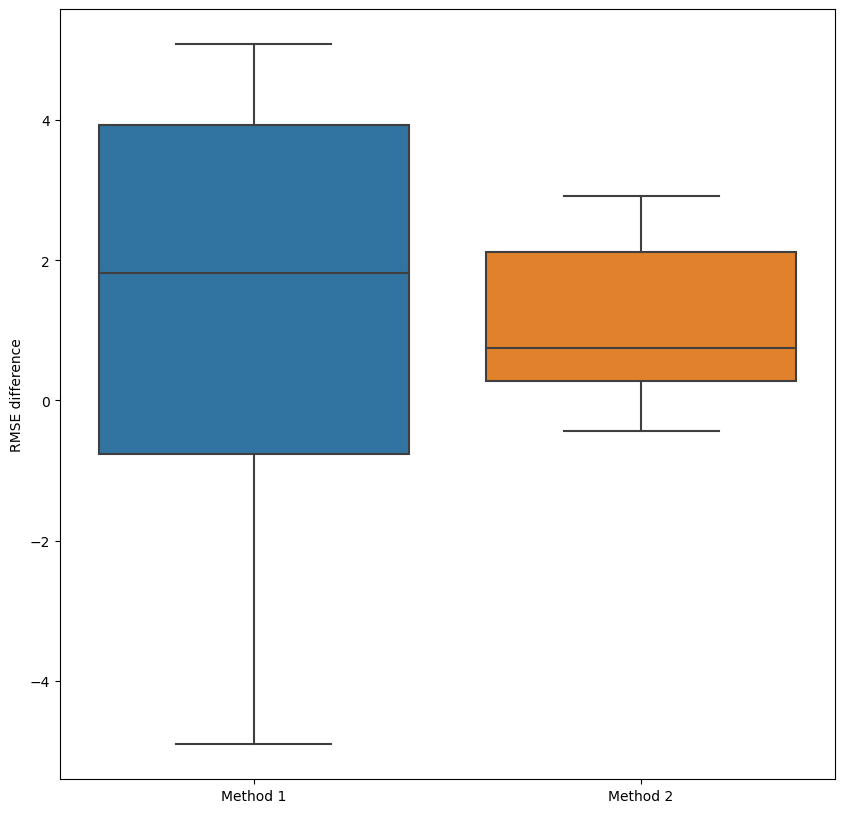

In [41]:
# Box Plot for the differences between RMSEs of train and test sets for method 1 and 2
import matplotlib.pyplot as plt
import seaborn as sns

method_1_results = method_logs_df[method_logs_df.method == 1].rmse_val - method_logs_df[method_logs_df.method == 1].rmse_tr
method_2_results = method_logs_df[method_logs_df.method == 2].rmse_val - method_logs_df[method_logs_df.method == 2].rmse_tr


plt.figure(figsize=(10, 10))
sns.boxplot(data=[method_1_results, method_2_results])
plt.xticks([0, 1], ['Method 1', 'Method 2'])
plt.ylabel('RMSE difference')
plt.show()


In [42]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(d) Comment on why the results look like they do? In general, when tuning parameters, is it better to use one training-validation split or K-fold cross-validation? Why?

**Answer:**

## Task 5. Regularization parameter effect on the coefficients  (1 point)

#### <font color='purple'>(a) The regularization parameter influences the values of the coefficients. Create two plots (one for Ridge and one for Lasso) that have the regularization parameter on the x-axis and coefficient values on the y-axis. You don't have to take all 99 values, you can take for example the first 20. Show each coefficient as a line (on the same plot) and comment on what happens when the regularization parameter increases. </font>

In [43]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [44]:

# Drop the duplicate alphas and models
method_eg_logs_df = method_logs_df.drop_duplicates(subset=["model", "alpha"])

In [45]:
ridge_coefs_df = method_eg_logs_df[method_eg_logs_df.model == "Ridge"][
    [col for col in method_eg_logs_df.columns if "coef" in col]
] # Ridge coefficients dataframe

lasso_coefs_df = method_eg_logs_df[method_eg_logs_df.model == "Lasso"][
    [col for col in method_eg_logs_df.columns if "coef" in col]
] # Lasso coefficients dataframe

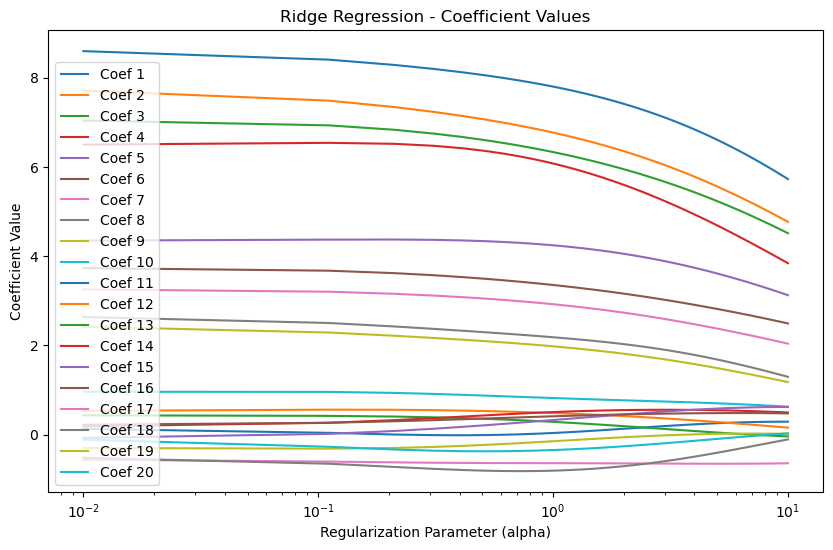

In [46]:
ridge_alphas = method_eg_logs_df[method_eg_logs_df.model == "Ridge"].alpha
ridge_coefs = np.array(ridge_coefs_df)

plt.figure(figsize=(10, 6))
for i in range(20):
    plt.plot(ridge_alphas, ridge_coefs[:, i], label=f"Coef {i+1}")
plt.xscale('log')
plt.xlabel("Regularization Parameter (alpha)")
plt.ylabel("Coefficient Value")
plt.title("Ridge Regression - Coefficient Values")
plt.legend()
plt.show()

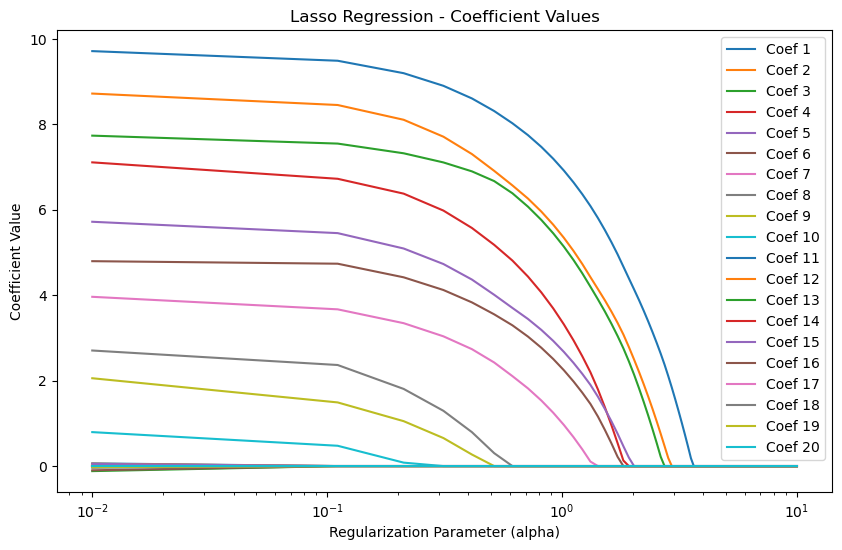

In [47]:
lasso_alphas = method_eg_logs_df[method_eg_logs_df.model == "Ridge"].alpha
lasso_coefs = np.array(lasso_coefs_df)

plt.figure(figsize=(10, 6))
for i in range(20):
    plt.plot(lasso_alphas, lasso_coefs[:, i], label=f"Coef {i+1}")
plt.xscale('log')
plt.xlabel("Regularization Parameter (alpha)")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression - Coefficient Values")
plt.legend()
plt.show()

In [48]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) What does Ridge regression do and what does Lasso regression do? How do they differ? </font>

The main difference between lasso and ridge regression is that lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features. 

## Task 6. Evaluating different models  (1 point)

#### <font color='purple'>(a) Choose the values of alpha for Ridge and Lasso according to subtask (4b). Now let's see which model works best for our data by evaluating the test RMSE. Compare the following models by reporting the training and testing set RMSE: </font>

1. Non-regularized linear regression
2. Ridge regression with your chosen parameter
3. Lasso regression with your chosen parameter
4. A "dumb" model that always predicts the mean value of y_train
5. An ideal model that the instructors have used for generating the data (the true coefficients are [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, ..., 0] and intercept 0).

In [49]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [50]:
lr_rmse_tr, lr_rmse_te = evaluate(lr, X_train, y_train, X_test, y_test)


#################

LinearRegression() 

RMSE train: 2.0525446936460357e-14
RMSE test: 7.715131133028424


In [51]:
ridge_rmse_tr, ridge_rmse_te = (
    method_logs_df[method_logs_df.model == "Ridge"]
    .sort_values(by="rmse_val")
    .iloc[0][["rmse_val", "rmse_tr"]]
    .array
)
print(f"Ridge RMSE train: {ridge_rmse_tr}, Ridge RMSE test: {ridge_rmse_te}")

Ridge RMSE train: 1.5670389558440032, Ridge RMSE test: 0.5076164728267466


In [52]:
lasso_rmse_tr, lasso_rmse_te = (
    method_logs_df[method_logs_df.model == "Lasso"]
    .sort_values(by="rmse_val")
    .iloc[0][["rmse_val", "rmse_tr"]]
    .array
)
print(f"Lasso RMSE train: {lasso_rmse_tr}, Lasso RMSE test: {lasso_rmse_te}")

Lasso RMSE train: 0.39820454962482044, Lasso RMSE test: 0.2810806547301112


In [53]:
from sklearn.base import BaseEstimator, RegressorMixin

class MeanRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.mean_value = None

    def fit(self, X, y):
        self.mean_value = np.mean(y)
        return self

    def predict(self, X):
        return np.full(X.shape[0], self.mean_value)


mean_reg = MeanRegressor()
mean_reg.fit(X_train, y_train)

mean_reg_rmse_tr, mean_reg_rmse_te = evaluate(mean_reg, X_train, y_train, X_test, y_test)


#################

MeanRegressor() 

RMSE train: 11.047120424571311
RMSE test: 11.321862747375917


In [55]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) Which method gives the best results and by looking at which value do you claim that? Why did this method work the best in your opinion?

The best Regulization method is Lasso, because it has the lowest RMSE on the test set.

#### <font color='purple'>(c) Were all of the "smart" models better than the "dumb" one (baseline). What would it mean if the learned model would give worse results?

Yeah, the "smart" models are better in this scenario. But if the opposite happened then it would mean that the model is overfitting the training data.

#### <font color='purple'>(d) Were the learned models far from the ideal one? Were the learned coefficients similar to the true ones?

In [56]:
method_logs_df[method_logs_df.model == "Ridge"].sort_values(by="rmse_val").iloc[0][
    [f"coef_{i}" for i in range(99)]
].array

<PandasArray>
[    8.014617695593921,     7.137577014451862,     7.151155947270596,
     5.926486776092222,     4.560469285588903,     3.167400610932819,
    3.5817765602047067,      2.20507143954847,    1.4890355084895661,
    1.0074339742763976,    0.4376992948267038,    0.4406983453728732,
   -0.2079041175732581,   0.03712896811992328,    0.1772933806816277,
   0.14373956306193292,   -0.5455808258080073,    -0.843500090087514,
    0.0116962584472593,   -0.7236341361556149,    0.7452538672188158,
  -0.04670247791560489,  -0.18250317227719615,   -0.5017305468250908,
     1.040484540637669,   -0.2538957426405559,  -0.13876506181754644,
    0.4170873248652798,   0.42146852164162785,   0.23982537941462517,
    -0.812082026330216,   -0.1523848269216188,      -1.0092206157361,
    0.7091320133468089,  -0.10148429206175202,  -0.19122522645224754,
  -0.03521793220286251,    0.7488670118114493,  -0.21105778002971953,
    -0.391536734395209,   0.18783641111602217,    0.2686402887769429,
   -0.

In [57]:
method_logs_df[method_logs_df.model == "Lasso"].sort_values(by="rmse_val").iloc[0][
    [f"coef_{i}" for i in range(99)]
].array

<PandasArray>
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -0.0,  0.0,  0.0,  0.0, -0.0,  0.0,
  0.0,  0.0,  0.0, -0.0,  0.0, -0.0,  0.0,  0.0, -0.0, -0.0, -0.0,  0.0,  0.0,
 -0.0, -0.0,  0.0,  0.0, -0.0, -0.0, -0.0,  0.0, -0.0, -0.0,  0.0,  0.0, -0.0,
 -0.0,  0.0,  0.0,  0.0,  0.0, -0.0,  0.0,  0.0, -0.0, -0.0, -0.0,  0.0,  0.0,
 -0.0,  0.0, -0.0, -0.0, -0.0,  0.0,  0.0, -0.0,  0.0,  0.0,  0.0,  0.0, -0.0,
  0.0,  0.0, -0.0, -0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -0.0,  0.0,  0.0,  0.0,
  0.0,  0.0, -0.0, -0.0, -0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -0.0,
 -0.0, -0.0,  0.0,  0.0, -0.0, -0.0,  0.0, -0.0]
Length: 99, dtype: object

The learned models were not far from the ideal one, but the learned coefficients were not similar to the true ones, especially the Lasso model.

#### <font color='purple'>(e) Which model overfitted the most, how can you see that?

I don't think any of the models overfitted the data.

#### <font color='purple'>(f) Are regularized methods always better than methods without regularization (not only in this case but in general). Why/why not?

I think it depends on the data, but in general, regularized methods are better than methods without regularization, because they prevent overfitting.

 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>